<h1>Creación de un modelo siguiendo un árbol de decisión y un modelo Bayesiano Ingenuo Gausiano</h1>

In [2]:
#Librerías a usar

import numpy as np
np.random.seed(3301)
import pandas as pd
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 50)
import matplotlib.pyplot as plt

#Modelo
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split

#k fold validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold 

#Métricas
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix

<h3>Lectura de los datos</h3>

In [3]:
df_data = pd.read_csv('enfermedades_depurado.csv', sep=',', encoding = 'utf-8', index_col=0)
df_data.shape

(40607, 18)

In [4]:
df_data.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
Id,,,,,,,,,,,,,,,,,,
0,26.50,0.0,0,0.0,0.0,0.0,0,0.0,64,1.0,2.0,1,4.0,8.0,0,0,0,0
1,28.75,0.0,0,0.0,0.0,2.0,0,0.0,59,1.0,2.0,1,4.0,7.0,0,0,0,0
2,19.90,1.0,0,0.0,0.0,1.0,0,0.0,39,1.0,2.0,1,3.0,7.0,0,0,0,0
3,28.06,0.0,0,0.0,1.0,1.0,0,1.0,69,1.0,1.0,1,3.0,8.0,0,0,0,0
4,29.29,1.0,0,0.0,0.0,1.0,0,1.0,74,1.0,2.0,1,4.0,7.0,1,0,0,0


In [5]:
df_data.dtypes

BMI                 float64
Smoking             float64
AlcoholDrinking       int64
Stroke              float64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                 float64
AgeCategory           int64
Race                float64
Diabetic            float64
PhysicalActivity      int64
GenHealth           float64
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
HeartDisease          int64
dtype: object

In [6]:
df_data.describe()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
count,40607.000000,40607.000000,40607.000000,40607.000000,40607.000000,40607.000000,40607.000000,40607.000000,40607.000000,40607.000000,40607.000000,40607.000000,40607.000000,40607.000000,40607.000000,40607.000000,40607.000000,40607.000000
mean,28.263509,0.413352,0.068018,0.037235,3.249267,3.772896,0.137095,0.522989,56.550792,1.444135,1.911518,0.778265,3.609156,6.958135,0.131160,0.036890,0.093752,0.085847
std,6.319528,0.492441,0.251780,0.189339,7.841330,7.873519,0.343951,0.499477,17.362826,0.977799,0.411715,0.415419,1.041520,1.751385,0.337579,0.188495,0.291487,0.280142
min,12.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,1.000000,2.000000,1.000000,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,27.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,59.000000,1.000000,2.000000,1.000000,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000
75%,31.320000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.000000,69.000000,1.000000,2.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000
max,86.800000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,1.000000,80.000000,5.000000,4.000000,1.000000,5.000000,24.000000,1.000000,1.000000,1.000000,1.000000


<h3>Construcción del modelo</h3>

In [7]:
Y = df_data['HeartDisease']
X = df_data.drop(['HeartDisease'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=17)

In [8]:
gaussNB = GaussianNB()
gaussNB.fit(X_train, Y_train)

y_pred = gaussNB.predict(X_test)
confusion_matrix(Y_test, y_pred)

array([[10760,  1477],
       [  631,   533]])

/Users/alejandro/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


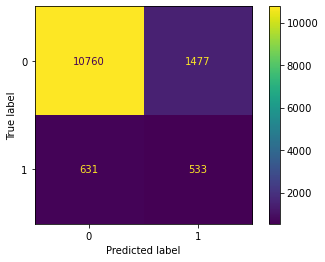

Exactitud: 0.84
Recall: 0.4579037800687285
Precisión: 0.2651741293532338
Puntuación F1: 0.3358538122243226


In [9]:
plot_confusion_matrix(gaussNB, X_test, Y_test)  
plt.show()
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

In [10]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     12237
           1       0.27      0.46      0.34      1164

    accuracy                           0.84     13401
   macro avg       0.60      0.67      0.62     13401
weighted avg       0.89      0.84      0.86     13401



/Users/alejandro/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


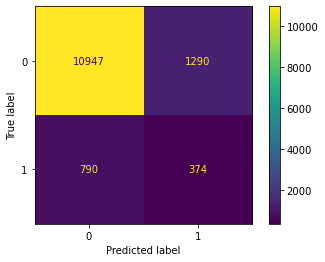

Exactitud: 0.84
Recall: 0.32130584192439865
Precisión: 0.2247596153846154
Puntuación F1: 0.2644978783592645


In [11]:
multNB = MultinomialNB()
multNB.fit(X_train, Y_train)

y_pred = multNB.predict(X_test)
confusion_matrix(Y_test, y_pred)

plot_confusion_matrix(multNB, X_test, Y_test)  
plt.show()
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

In [12]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     12237
           1       0.22      0.32      0.26      1164

    accuracy                           0.84     13401
   macro avg       0.58      0.61      0.59     13401
weighted avg       0.87      0.84      0.86     13401



<h1>Modelo basado en árboles de decisión</h1>

/Users/alejandro/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


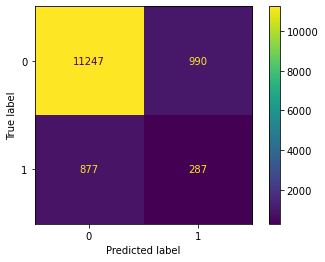

Exactitud: 0.86
Recall: 0.24656357388316152
Precisión: 0.22474549725920126
Puntuación F1: 0.23514952888160592


In [13]:
arbol = DecisionTreeClassifier(criterion='entropy', random_state=0)
arbol = arbol.fit(X_train,Y_train)

y_pred = arbol.predict(X_test)
confusion_matrix(Y_test, y_pred)

plot_confusion_matrix(arbol, X_test, Y_test)  
plt.show()  

print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

In [14]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     12237
           1       0.22      0.25      0.24      1164

    accuracy                           0.86     13401
   macro avg       0.58      0.58      0.58     13401
weighted avg       0.87      0.86      0.86     13401



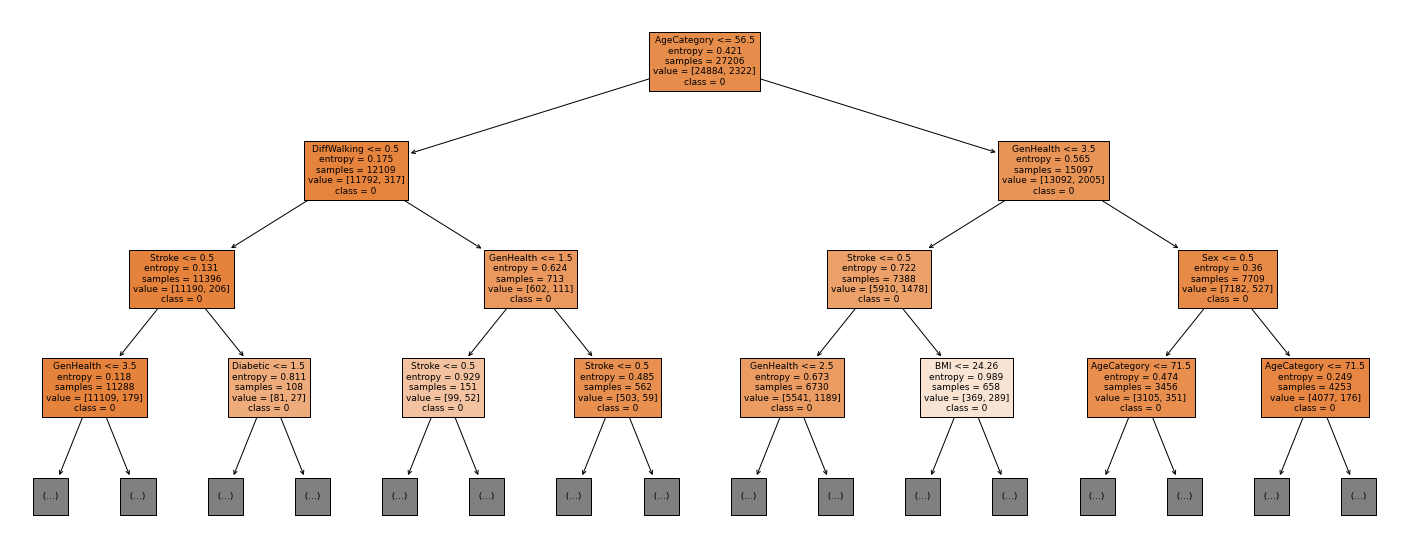

In [15]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(arbol, max_depth=3, feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=9)

<h3>Cross Fold Validation</h3>

In [16]:
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[4,6,8,10,20],'min_samples_split':[2, 3, 4, 5]}

arbol = DecisionTreeClassifier(random_state=0)

mejor_modelo = GridSearchCV(arbol, param_grid, cv=particiones)
mejor_modelo.fit(X_train, Y_train)
mejor_modelo.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}

In [17]:
arbol_final = mejor_modelo.best_estimator_

y_pred_train = arbol_final.predict(X_train)
y_pred_test = arbol_final.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.92
Exactitud sobre test: 0.91


In [18]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.95     12237
           1       0.49      0.05      0.09      1164

    accuracy                           0.91     13401
   macro avg       0.70      0.52      0.52     13401
weighted avg       0.88      0.91      0.88     13401



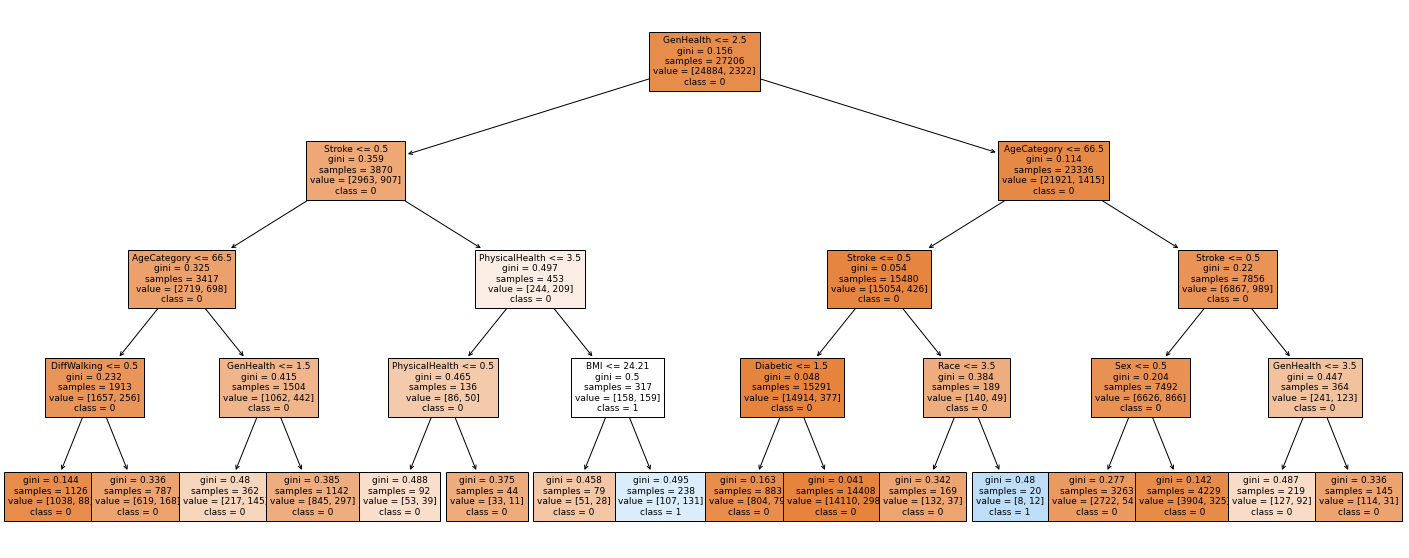

In [21]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(arbol_final, max_depth=4, feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=9)

/Users/alejandro/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


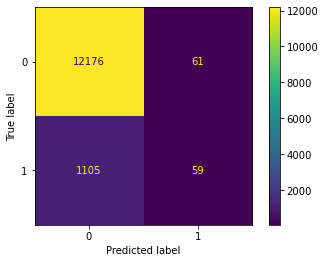

Exactitud: 0.91
Recall: 0.0506872852233677
Precisión: 0.49166666666666664
Puntuación F1: 0.09190031152647975


In [19]:
confusion_matrix(Y_test, y_pred_test)
plot_confusion_matrix(arbol_final, X_test, Y_test)  
plt.show()  

print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred_test))
print("Recall: {}".format(recall_score(Y_test,y_pred_test)))
print("Precisión: {}".format(precision_score(Y_test,y_pred_test)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred_test)))